In [61]:
import numpy as np
import healpy as hp
from astropy.io import ascii
from astropy.io import fits
import matplotlib.pyplot as plt
%matplotlib inline

In [82]:
print 'Reading files'
w = ascii.read('wen.csv') 
r = fits.open('redmapper.fits') 
r = r[1].data
print len(w)
print len(r)
print w

Reading files
132684
26111
      WHL         RAJ2000   DEJ2000   zph   ...  RL*  N200       Other       
---------------- --------- --------- ------ ... ----- ---- ------------------
J000000.6+321233   0.00236  32.20925 0.1274 ... 70.63   24              Abell
J000002.3+051718   0.00957   5.28827 0.1696 ... 17.48    9                 --
J000003.3+311354   0.01377  31.23175 0.5428 ... 14.27    8                 --
J000003.5+314708   0.01475  31.78564 0.0932 ... 16.97    9                 --
J000004.7+022826   0.01945   2.47386 0.4179 ... 13.71   10                 --
J000004.9-033248   0.02024  -3.54679 0.5968 ... 19.19   11                 --
J000005.5+354610   0.02303  35.76957 0.4762 ... 15.58    9                 --
J000006.0+152548   0.02482   15.4299 0.1656 ... 23.53   19 maxBCG,WHL09,GMBCG
J000006.3+221220   0.02643  22.20558 0.3985 ... 12.73   11                 --
J000006.6+100648   0.02755  10.11333 0.3676 ... 16.73   13                 --
             ...       ...       ... 

In [63]:
# RA e DEC - catalogo Wen
print w['RAJ2000'], w['DEJ2000']

# RA e DEC catalogo Redmapper
print r['RA'], r['DEC']

 RAJ2000 
---------
  0.00236
  0.00957
  0.01377
  0.01475
  0.01945
  0.02024
  0.02303
  0.02482
  0.02643
  0.02755
      ...
359.97192
359.97241
 359.9729
359.97311
359.97504
359.97543
359.98712
359.99329
  359.995
359.99677
 359.9986
Length = 132684 rows  DEJ2000 
---------
 32.20925
  5.28827
 31.23175
 31.78564
  2.47386
 -3.54679
 35.76957
  15.4299
 22.20558
 10.11333
      ...
 -9.76429
 13.70903
  -7.9587
  3.45559
 30.13158
-11.13708
 22.67506
 13.29671
  0.70175
 21.78513
 -3.43781
Length = 132684 rows
[ 239.58332907  250.08254839  197.87295717 ...,  180.83079888  153.82422578
  135.96337099] [ 27.23341292  46.71153135  -1.34111628 ...,  52.37043161  43.63535754
  15.20173173]


In [167]:
NSIDE = 64

In [168]:
phi_w = np.deg2rad(w['RAJ2000'])
theta_w = np.deg2rad(90.-w['DEJ2000'])
phi_r = np.deg2rad(r['RA'])
theta_r = np.deg2rad(90.-r['DEC'])

In [169]:
wpix = hp.ang2pix(NSIDE, theta_w, phi_w)
n = np.arange(hp.nside2npix(NSIDE))

In [170]:
rpix = hp.ang2pix(NSIDE, theta_r, phi_r)
m = np.arange(hp.nside2npix(NSIDE))

In [171]:
print(hp.get_map_size(m))
print(hp.get_map_size(n))

49152
49152


In [172]:
print len(wpix)
print len(rpix)

132684
26111


In [173]:
for i in range(len(w)):
    wpix[i], w['WHL'][i]

KeyboardInterrupt: 

In [131]:
pixel1 = []
pixel2 = []
for i in range(0,len(wpix)-1):
    if wpix[i] == wpix[i+1]:
        pixel1.append(i)
        pixel2.append(i+1)

In [147]:
for i in range(0,len(pixel1)):
    a = hp.pix2ang(NSIDE,pixel1[i])
    b = hp.pix2ang(NSIDE,pixel2[i])
    a = np.rad2deg(a)
    b = np.rad2deg(b)

In [174]:
#Retira os numeros de pixels repetidos
wpix = np.unique(wpix)
rpix = np.unique(rpix)
print len(wpix)
print len(rpix)

17491
10431


In [175]:
lista = []
rp = range(0,len(rpix))
wp = range(0,len(wpix))
for wp in wpix: 
    for rp in rpix:
        if wp==rp:
            lista.append(wp)

In [176]:
match = hp.pix2ang(NSIDE, lista)
print match

(array([ 0.3721183 ,  0.3721183 ,  0.3721183 , ...,  1.77002841,
        1.77002841,  1.77002841]), array([ 3.00617918,  3.11450996,  3.16867535, ...,  0.12271846,
        6.23409792,  6.25864161]))


In [177]:
print len(lista)

10429


In [178]:
#new_ftprt = [i for i in fprt1 if i in dict(np.array([fprt2, fprt2]).T)]

In [179]:
#sysmap = np.zeros(hp.nside2npix(NSIDE),dtype=np.float32) + hp.UNSEEN
wmap = np.zeros(hp.nside2npix(NSIDE), dtype=np.int8) + hp.UNSEEN
rmap = np.zeros(hp.nside2npix(NSIDE), dtype=np.int8) + hp.UNSEEN
mmap = np.zeros(hp.nside2npix(NSIDE), dtype=np.int8) + hp.UNSEEN

In [185]:
wmap[wpix] = np.random.randn(len(wpix))
rmap[rpix] = 1
mmap[lista] = 1


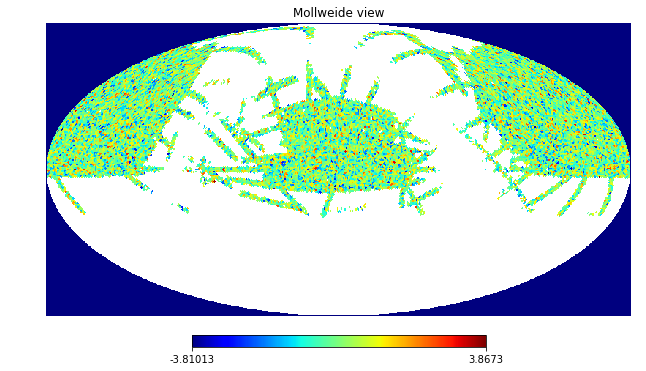

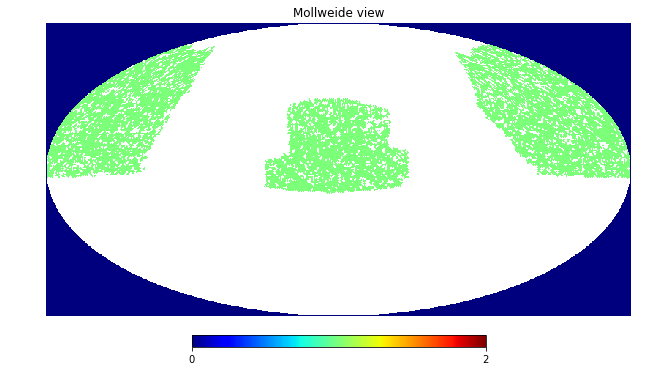

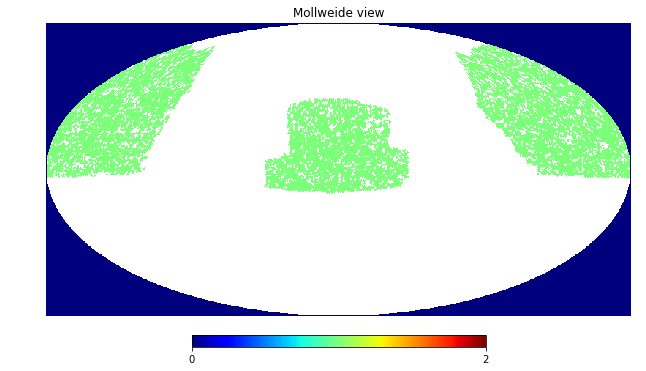

In [186]:
hp.mollview(wmap, fig=1, cmap='jet')
hp.mollview(rmap, fig=2, cmap='jet')
hp.mollview(mmap, fig=3, cmap='jet')

Add Koester. Save resulting matching footprint. Apply map to files. Save files. Run Venn on them. 